In [76]:
from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import normal
from keras.utils import plot_model
from deap import base, creator, tools, algorithms
import numpy as np

In [63]:
def build_model(n_layers, input_dim, neurons, activation='sigmoid', initializer=None):
    if isinstance(neurons, list):
        assert len(neurons) == n_layers
    else:
        neurons = [neurons] * n_layers
        
    if initializer is None:
        # Uses normal initializer
        initializer = normal(mean=0, stddev=0.1, seed=13)
        
    model = Sequential()
    
    # Adds first hidden layer with input_dim parameter
    model.add(Dense(units=neurons[0], 
                    input_shape=(input_dim,), 
                    activation=activation,
                    kernel_initializer=initializer, 
                    name='hidden_layer'))
    
    
    # Adds output layer
    model.add(Dense(units=2, activation=activation, kernel_initializer=initializer, name='net_output'))
    
    # Compiles the model
    model.compile(loss='mse', optimizer='Adam', metrics=['mse'])
    
    return model

In [64]:
data_dim = 8
timesteps = 8
x_train = np.random.random((1000, data_dim))

In [65]:
model = build_model(n_layers=1, input_dim=8, neurons=5)

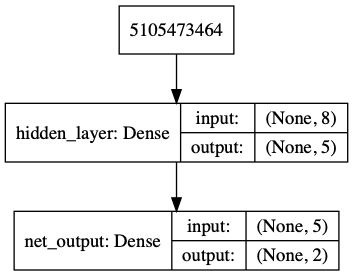

In [66]:
# Plot model graph
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
from IPython.display import Image
Image(retina=True, filename='model.png')

In [67]:
model.predict(x_train)

array([[0.5037489 , 0.4752452 ],
       [0.50349563, 0.47320807],
       [0.50266474, 0.47383896],
       ...,
       [0.50367403, 0.47519112],
       [0.5034663 , 0.4735018 ],
       [0.5036728 , 0.4747228 ]], dtype=float32)

In [68]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer (Dense)         (None, 5)                 45        
_________________________________________________________________
net_output (Dense)           (None, 2)                 12        
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________
None


In [77]:
model.get_weights()

[array([[ 0.01745166, -0.0225782 ,  0.01967431,  0.0387477 ,  0.0251386 ],
        [ 0.00515667, -0.01068268, -0.12614495, -0.02336994, -0.10256433],
        [-0.05181826, -0.03860423, -0.13391905, -0.06569492,  0.14408804],
        [ 0.08051246,  0.07736253,  0.01508499,  0.02778573, -0.08993146],
        [ 0.13227466,  0.0797508 ,  0.0829831 ,  0.01504011, -0.09476091],
        [-0.07435729, -0.00698865, -0.06255804, -0.1166985 , -0.01686729],
        [ 0.06776601, -0.03450424,  0.17205839, -0.02406461,  0.0395343 ],
        [ 0.04086174, -0.06989031, -0.11005199,  0.00247568,  0.14773326]],
       dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.01745166, -0.0225782 ],
        [ 0.01967431,  0.0387477 ],
        [ 0.0251386 ,  0.00515667],
        [-0.01068268, -0.12614495],
        [-0.02336994, -0.10256433]], dtype=float32),
 array([0., 0.], dtype=float32)]

In [70]:
model.get_layer(name='hidden_layer')

In [71]:
# including the bias weights
for l in model.layers:
    print(l.get_config())
    print(l.get_weights())

{'name': 'hidden_layer', 'trainable': True, 'batch_input_shape': (None, 8), 'dtype': 'float32', 'units': 5, 'activation': 'sigmoid', 'use_bias': True, 'kernel_initializer': {'class_name': 'RandomNormal', 'config': {'mean': 0, 'stddev': 0.1, 'seed': 13}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
[array([[ 0.01745166, -0.0225782 ,  0.01967431,  0.0387477 ,  0.0251386 ],
       [ 0.00515667, -0.01068268, -0.12614495, -0.02336994, -0.10256433],
       [-0.05181826, -0.03860423, -0.13391905, -0.06569492,  0.14408804],
       [ 0.08051246,  0.07736253,  0.01508499,  0.02778573, -0.08993146],
       [ 0.13227466,  0.0797508 ,  0.0829831 ,  0.01504011, -0.09476091],
       [-0.07435729, -0.00698865, -0.06255804, -0.1166985 , -0.01686729],
       [ 0.06776601, -0.03450424,  0.17205839, -0.02406461,  0.0395343 ],
       [ 0.04086174, -0.0698903

In [95]:
creator.create("FitnessMax", base.Fitness, weights=(1.0, 1.0))
creator.create("Individual", list, fitness=creator.FitnessMax, model=None)

/Users/richban/.local/share/virtualenvs/behavioral.neuroevolution-ViNSkuNA/lib/python3.7/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/Users/richban/.local/share/virtualenvs/behavioral.neuroevolution-ViNSkuNA/lib/python3.7/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [96]:
def initIndividual(cls, model):
    weights = [np.random.permutation(w.flat).reshape(w.shape) for w in model.get_weights()]
    return cls(weights)

In [97]:
toolbox = base.Toolbox()
toolbox.register("individual", initIndividual, creator.Individual, model=model)

In [98]:
ind1 = toolbox.individual()

In [99]:
ind1.fitness.values = (1.0, 1.1)
print(ind1.fitness)

(1.0, 1.1)


In [107]:
mutant = toolbox.clone(ind1)
ind2, = tools.mutGaussian(mutant, mu=0.0, sigma=0.2, indpb=0.2)
del mutant.fitness.values

In [131]:
def mutateIndividual(individual):
    mutant = toolbox.clone(ind1)
    mutated_ind = [tools.mutGaussian(weight, mu=0.0, sigma=0.2, indpb=0.9) for weight in mutant]
    del mutant.fitness.values
    return mutated_ind

In [132]:
ind1

[array([[ 0.01745166,  0.07736253,  0.0251386 ,  0.0395343 , -0.10256433],
        [-0.09476091, -0.03860423, -0.03450424,  0.06776601,  0.13227466],
        [-0.1166985 ,  0.0829831 , -0.06255804, -0.02336994,  0.01967431],
        [ 0.17205839, -0.0225782 , -0.06569492, -0.13391905, -0.02406461],
        [ 0.01504011,  0.00247568,  0.14408804, -0.07435729, -0.12614495],
        [-0.00698865, -0.01068268,  0.00515667, -0.01686729,  0.01508499],
        [-0.06989031,  0.14773326, -0.08993146,  0.08051246,  0.0797508 ],
        [-0.11005199,  0.0387477 ,  0.02778573,  0.04086174, -0.05181826]],
       dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.01068268,  0.01967431],
        [ 0.0251386 , -0.10256433],
        [-0.12614495,  0.0387477 ],
        [-0.02336994, -0.0225782 ],
        [ 0.01745166,  0.00515667]], dtype=float32),
 array([0., 0.], dtype=float32)]

In [133]:
mutateIndividual(ind1)

[(array([[-0.01647037,  0.0434405 , -0.00878343,  0.00561227, -0.13648635],
         [ 0.15730847,  0.21346515,  0.21756515,  0.3198354 ,  0.38434404],
         [ 0.03207975,  0.23176134,  0.0862202 ,  0.1254083 ,  0.16845256],
         [ 0.22841203,  0.03377543, -0.00934128, -0.07756541,  0.03228903],
         [-0.02782307, -0.0403875 ,  0.10122487, -0.11722046, -0.16900812],
         [ 0.01293306,  0.00923903,  0.02507838,  0.00305442,  0.03500669],
         [-0.28636003, -0.06873646, -0.3064012 , -0.13595727, -0.13671893],
         [-0.11005199,  0.0387477 ,  0.02778573,  0.04086174, -0.05181826]],
        dtype=float32),),
 (array([-0.10240438, -0.24227971, -0.32765624, -0.08640973, -0.25968757],
        dtype=float32),),
 (array([[-0.01068268,  0.01967431],
         [ 0.14680183,  0.01909891],
         [-0.2398702 , -0.07497756],
         [-0.22012606, -0.21933432],
         [ 0.21658039,  0.2042854 ]], dtype=float32),),
 (array([-0.00680333,  0.08284415], dtype=float32),)]

In [126]:
type(mutated)

list

In [134]:
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [135]:
pop = toolbox.population(n=20)

In [139]:
pop[0]

[array([[-0.0225782 ,  0.0797508 , -0.01068268,  0.01967431,  0.0395343 ],
        [-0.00698865, -0.02406461,  0.13227466,  0.07736253,  0.0829831 ],
        [ 0.01745166,  0.0251386 ,  0.14408804, -0.12614495,  0.14773326],
        [-0.13391905,  0.02778573, -0.03450424,  0.00247568,  0.0387477 ],
        [-0.07435729, -0.01686729, -0.02336994,  0.04086174, -0.06569492],
        [-0.08993146, -0.06255804,  0.08051246, -0.05181826,  0.17205839],
        [-0.10256433, -0.09476091, -0.11005199, -0.1166985 , -0.03860423],
        [ 0.01508499, -0.06989031,  0.06776601,  0.01504011,  0.00515667]],
       dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.01068268,  0.0387477 ],
        [ 0.00515667, -0.0225782 ],
        [ 0.0251386 ,  0.01967431],
        [ 0.01745166, -0.02336994],
        [-0.10256433, -0.12614495]], dtype=float32),
 array([0., 0.], dtype=float32)]

In [140]:
pop[1]

[array([[ 0.0829831 ,  0.0395343 , -0.00698865, -0.06255804,  0.07736253],
        [ 0.01745166,  0.17205839,  0.14773326, -0.10256433, -0.1166985 ],
        [-0.07435729, -0.02406461,  0.02778573, -0.06569492, -0.13391905],
        [ 0.01504011, -0.06989031,  0.0797508 , -0.01686729,  0.00515667],
        [ 0.08051246, -0.0225782 , -0.09476091, -0.05181826,  0.0387477 ],
        [ 0.14408804, -0.01068268, -0.03450424,  0.04086174,  0.01967431],
        [ 0.0251386 ,  0.06776601,  0.00247568, -0.03860423, -0.02336994],
        [-0.11005199,  0.01508499,  0.13227466, -0.08993146, -0.12614495]],
       dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.01745166,  0.00515667],
        [-0.02336994, -0.10256433],
        [-0.0225782 ,  0.0387477 ],
        [ 0.0251386 , -0.01068268],
        [ 0.01967431, -0.12614495]], dtype=float32),
 array([0., 0.], dtype=float32)]